In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('Autompg-LAPTOP-9I0U0Q4S.csv')
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [3]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [4]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model_year        int64
origin            int64
car_name         object
dtype: object

In [5]:
data = data[data.horsepower != '?']

In [6]:
data['horsepower']=data['horsepower'].astype('float')
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [7]:
data.describe()
# The average mpg is 23

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


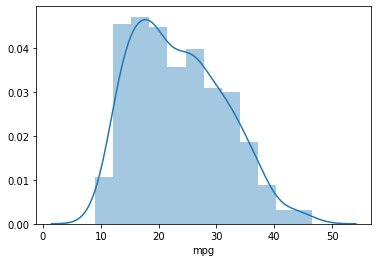

In [8]:
sns.distplot(data['mpg'])
plt.show()

In [9]:
data['origin'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,USA,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,USA,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,Europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,USA,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,USA,ford ranger


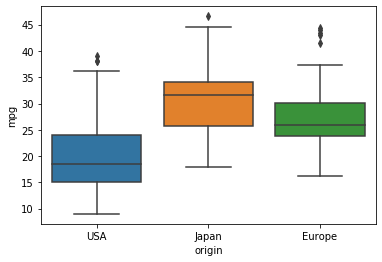

In [10]:
# Analyzing the mpg by country of origin
# Cars from USA have mpg close to the average mpg, whereas cars from Japan and Europe have higher than average mpg
sns.boxplot(x='origin', y='mpg', data=data)
plt.show()

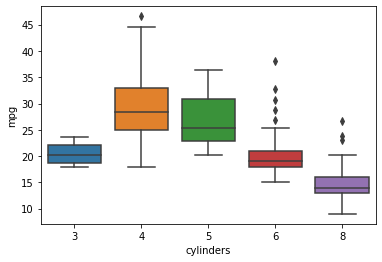

In [11]:
# Analyzing the mpg by number of cylinders
# Cars with four cylinder engine have highest average mpg
sns.boxplot(x='cylinders', y='mpg', data=data)
plt.show()

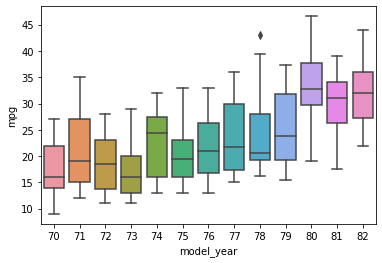

In [12]:
# Analyzing the mpg by model year
# Cars manufactured after 1979 have higher than average mpg
sns.boxplot(x='model_year', y='mpg', data=data)
plt.show()

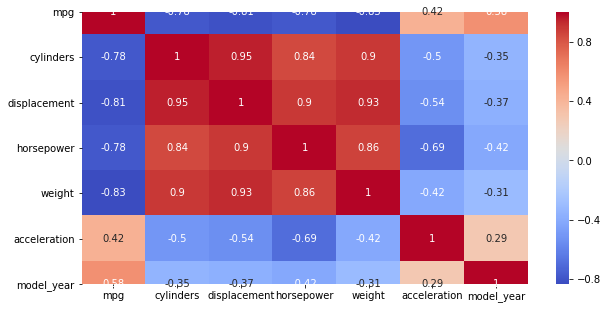

In [13]:
corrmat = data.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corrmat, annot=True, cmap='coolwarm')
plt.show()

In [14]:
x=data.drop(columns=['mpg', 'car_name'])
y=data['mpg']

In [15]:
x

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,8,307.0,130.0,3504,12.0,70,USA
1,8,350.0,165.0,3693,11.5,70,USA
2,8,318.0,150.0,3436,11.0,70,USA
3,8,304.0,150.0,3433,12.0,70,USA
4,8,302.0,140.0,3449,10.5,70,USA
...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,USA
394,4,97.0,52.0,2130,24.6,82,Europe
395,4,135.0,84.0,2295,11.6,82,USA
396,4,120.0,79.0,2625,18.6,82,USA


In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x)
a=sc.transform(x)
x=pd.DataFrame(a)
x

,0,1,2,3,4,5,6,7
0,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.50239,0.774597
1,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-0.50239,0.774597
2,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.50239,0.774597
3,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.50239,0.774597
4,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.50239,0.774597
...,...,...,...,...,...,...,...,...
387,-0.864014,-0.520637,-0.480448,-0.221125,0.021294,1.636410,-0.50239,0.774597
388,-0.864014,-0.932079,-1.364896,-0.999134,3.287676,1.636410,-0.50239,-1.290994
389,-0.864014,-0.568479,-0.532474,-0.804632,-1.430430,1.636410,-0.50239,0.774597
390,-0.864014,-0.712005,-0.662540,-0.415627,1.110088,1.636410,-0.50239,0.774597


In [21]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

In [22]:
from sklearn.metrics import r2_score
def maxr2score(cm,x,y):
    maxr2=0
    rs=0
    for r_state in range(0,150):
        x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = r_state,test_size=0.2)
        cm.fit(x_train,y_train)
        y_pred=cm.predict(x_test)
        rsc=r2_score(y_test,y_pred)
        if rsc>maxr2:
            maxr2=rsc
            rs=r_state
    print("Maximum r2_score is at random state :",rs," and it is :",maxr2)

In [25]:
# Using Linear regression model
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=.20)
lr=LinearRegression()
lr.fit(x_train,y_train)
predicty=lr.predict(x_test)
print('The mean absolute error for linear regression model is :', mean_absolute_error(y_test, predicty))
print('The mean square error for linear regression model is :', mean_squared_error(y_test, predicty))
print('The root mean square error for linear regression model is :', np.sqrt(mean_squared_error(y_test, predicty)))

The mean absolute error for linear regression model is : 2.4619996980661503
The mean square error for linear regression model is : 10.60227901168838
The root mean square error for linear regression model is : 3.256114096847403


In [26]:
# Using Ridge regression
from sklearn.linear_model import Ridge
rr=Ridge()
hyperparametersrr={'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
gridrr = GridSearchCV(rr, hyperparametersrr, cv=10)
gridrr.fit(x,y)
gridrr.best_params_

{'alpha': 0.0001}

In [27]:
from sklearn.linear_model import Ridge
rr=Ridge(alpha=0.0001)
maxr2score(rr,x,y)

Maximum r2_score is at random state : 36  and it is : 0.8771302737774674


In [28]:
print("Mean r2 score for Ridge regression after cross validation: ", cross_val_score(rr,x,y,cv=5,scoring="r2").mean())
print("Standard deviation for Ridge regression from mean r2 score is : ", cross_val_score(rr,x,y,cv=5,scoring="r2").std())

Mean r2 score for Ridge regression after cross validation:  0.5936616800203781
Standard deviation for Ridge regression from mean r2 score is :  0.19686724772848851


In [29]:
# Using Lasso regression
from sklearn.linear_model import Lasso
lar=Lasso()
hyperparameterlar={'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
gridlar = GridSearchCV(lar, hyperparameterlar, cv=5)
gridlar.fit(x,y)
gridlar.best_params_

{'alpha': 0.0001}

In [30]:
from sklearn.linear_model import Lasso
lar=Lasso(alpha=0.0001)
maxr2score(lar,x,y)

Maximum r2_score is at random state : 36  and it is : 0.8771446285288054


In [31]:
print("Mean r2 score for Lasso regression after cross validation: ", cross_val_score(lar,x,y,cv=5,scoring="r2").mean())
print("Standard deviation for Lasso regression from mean r2 score is : ", cross_val_score(lar,x,y,cv=5,scoring="r2").std())

Mean r2 score for Lasso regression after cross validation:  0.5936391971477938
Standard deviation for Lasso regression from mean r2 score is :  0.19692419302661784


In [32]:
# Using KNN regressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
hyperparameter={"n_neighbors":range(1,12)}
gridknr = GridSearchCV(knr, hyperparameter, cv=5, n_jobs=-1)
gridknr.fit(x,y)
gridknr.best_params_

{'n_neighbors': 4}

In [33]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=4)
maxr2score(knr,x,y)

Maximum r2_score is at random state : 36  and it is : 0.9235005028289005


In [34]:
print("Mean r2 score for KNeighborsRegressor after cross validation: ", cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("Standard deviation for KNeighborsRegressor from mean r2 score is : ", cross_val_score(knr,x,y,cv=5,scoring="r2").std())

Mean r2 score for KNeighborsRegressor after cross validation:  0.6796745635300956
Standard deviation for KNeighborsRegressor from mean r2 score is :  0.23441747882491404


In [35]:
# Using Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
hyperparametersdtr={'criterion':['mse','mae'],'max_depth':range(1,2)}
griddtr=GridSearchCV(dtr, hyperparametersdtr, cv=5, scoring='r2')
griddtr.fit(x,y)
print(griddtr.best_params_)

{'criterion': 'mae', 'max_depth': 1}


In [36]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(criterion='mse', max_depth=1)
maxr2score(dtr,x,y)

Maximum r2_score is at random state : 59  and it is : 0.6847504471097152


In [37]:
print("Mean r2 score for Decision Tree Regressor after cross validation: ", cross_val_score(dtr,x,y,cv=5,scoring="r2").mean())
print("Standard deviation for Decision Tree Regressor from mean r2 score is : ", cross_val_score(dtr,x,y,cv=5,scoring="r2").std())

Mean r2 score for Decision Tree Regressor after cross validation:  0.052499188161060806
Standard deviation for Decision Tree Regressor from mean r2 score is :  0.6131615940321572


In [42]:
# Among all the models, KNN Regressor is the best performing model
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 36,test_size=0.20)
knr=KNeighborsRegressor(n_neighbors=4)
knr.fit(x_train,y_train)
predictknry=knr.predict(x_test)
print('The mean absolute error for linear regression model is :', mean_absolute_error(y_test, predictknry))
print('The mean square error for linear regression model is :', mean_squared_error(y_test, predictknry))
print('The root mean square error for linear regression model is :', np.sqrt(mean_squared_error(y_test, predictknry)))

The mean absolute error for linear regression model is : 1.5376582278481012
The mean square error for linear regression model is : 4.066242088607594
The root mean square error for linear regression model is : 2.0164925213368865


In [43]:
# Saving the decision tree model
from sklearn.externals import joblib 
joblib.dump(knr, 'Auto_mpg_knr.pkl')

['Auto_mpg_knr.pkl']